# Lead Scoring Case Study


**Lead Scoring Case Study**                                                                         
 This is a group case study                                                                              
                                                                                                         
 Members:                                                                                                
 1. Bhanu Pratap                                                                                           
 2. Shadab Hussain                                                                                      
 3. Md Liyakat                                                                                         
 4. Nidhi Tripathi                                                                                   
 <br> 
 
**Brief on subject:**<br>
 An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. <br>
 The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.<br>
 
 Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.<br>

**Business objective:** <br>
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.<br>
 
**Input files used:**   
- Leads.csv -This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. 

### Step 1: Importing and Understanding Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Leads = pd.read_csv("Leads.csv")

In [4]:
# Let's check the dimensions of the dataframe
Leads.shape

(9240, 37)

We have 9240 records and 37 features in our dataset.

In [5]:
# Check the head of the dataset
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# Let's see the type of each column
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

### Step 2: Data Cleaning

In [7]:
# checking the missing data
Leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# checking the percentage of nulls in each columns
round(100*Leads.isnull().sum()/len(Leads.index),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

From the above result, we can clearly say that we have some columns with high percentages of the nulls. We need to take care of these columns.

In [9]:
# Collecting the columns which has more than 30% null values.
columns_30 = Leads.columns[100*(Leads.isnull().sum()/len(Leads.index)) > 30]
columns_30

Index(['Tags', 'Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [10]:
# Dropping the columns which has more than 30% null values.
Leads = Leads.drop(columns_30, axis=1)
print(Leads.shape)

(9240, 31)


In [11]:
# checking the percentage of nulls in each columns
round(100*Leads.isnull().sum()/len(Leads.index),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [12]:
# checking the counts of different values in the country column
Leads.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Nigeria                    4
Canada                     4
South Africa               4
Germany                    4
Sweden                     3
Bangladesh                 2
Netherlands                2
Italy                      2
Philippines                2
Asia/Pacific Region        2
Uganda                     2
Belgium                    2
China                      2
Ghana                      2
Vietnam                    1
Liberia                    1
Switzerland                1
Tanzania                   1
Indonesia                  1
Denmark                    1
Russia        

The country column has 2461 null and 6492 entries as India. The variation provided by this column is very low , dropping the country column.

In [13]:
# Drppping the country column
Leads = Leads.drop("Country",axis=1 )

In [14]:
# checking the counts of different values in the Magazine column
Leads.Magazine.value_counts(dropna = False)

No    9240
Name: Magazine, dtype: int64

In [15]:
# checking the counts of different values in the Receive More Updates About Our Courses column
Leads['Receive More Updates About Our Courses'].value_counts(dropna = False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [16]:
# checking the counts of different values in the Update me on Supply Chain Content column
Leads['Update me on Supply Chain Content'].value_counts(dropna = False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [17]:
# checking the counts of different values in the Get updates on DM Content column
Leads['Get updates on DM Content'].value_counts(dropna = False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [18]:
# checking the counts of different values in the I agree to pay the amount through cheque column
Leads['I agree to pay the amount through cheque'].value_counts(dropna = False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

The columns `Magazine`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque` has all the values as `No`. These columns are not providing any variance. So it will be better  if we drop them.

In [19]:
# columns with no variance
col_drop = ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
            'Get updates on DM Content', 'I agree to pay the amount through cheque']

In [20]:
# Dropping the columns with no variance
Leads = Leads.drop(col_drop, axis=1)

In [21]:
Leads.shape

(9240, 25)

In [22]:
# checking the counts of different values in the What matters most to you in choosing a course column
Leads['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

The column `What matters most to you in choosing a course` has 2709 nulls and 6528 entries as `Better Career Prospects`. This column is not providing the much variance to the dataset. So it will be better to drop this.

In [23]:
# dropping the What matters most to you in choosing a course column
Leads = Leads.drop('What matters most to you in choosing a course', axis=1)

In [24]:
# checking the unique entries in the column Prospect ID
Leads['Prospect ID'].nunique()

9240

In [25]:
# checking the unique entries in the column Lead Number
Leads['Lead Number'].nunique()

9240

The columns `Lead Number` and `Prospect ID` is unique for every records. So these columns will not be helpful in the prediction. It is better to drop these columns.


In [27]:
# checking the counts of different values in the Do Not Call column
Leads['Do Not Call'].value_counts(dropna = False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [28]:
# checking the counts of different values in the Do Not Email
Leads['Do Not Email'].value_counts(dropna = False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [29]:
# checking the counts of different values in the column 'Search'
Leads['Search'].value_counts(dropna = False)

No     9226
Yes      14
Name: Search, dtype: int64

In [30]:
# checking the counts of different values in the column 'Newspaper Article'
Leads['Newspaper Article'].value_counts(dropna = False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [31]:
# checking the counts of different values in the column 'X Education Forums'
Leads['X Education Forums'].value_counts(dropna = False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [32]:
# checking the counts of different values in the column 'Newspaper'
Leads['Newspaper'].value_counts(dropna = False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [33]:
# checking the counts of different values in the column 'Digital Advertisement'
Leads['Digital Advertisement'].value_counts(dropna = False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [34]:
# checking the counts of different values in the column 'Through Recommendations'
Leads['Through Recommendations'].value_counts(dropna = False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

- The columns `Do Not Call` has 9238 entries as `No` and only 2 entries as `Yes`. 
- The column `Do Not Email`  has 8506 entries as `No` and only 734 entries as `Yes`.
- The column `Search`  has 9226 entries as `No`' and only 14 entries as `Yes`.
- The column `Newspaper Article`  has 9238 entries as `No` and only 2 entries as `Yes`.
- The column `X Education Forums`  has 9239 entries as `No` and only 1 entries as `Yes`.
- The column `Newspaper`  has 9239 entries as `No` and only 1 entries as `Yes`.
- The column `Digital Advertisement`  has 9236 entries as `No` and only 4 entries as `Yes`.
- The column `Through Recommendations'`  has 9233 entries as `No` and only 7 entries as `Yes`.

These columns are not providing the enough variance to the dataset. It is better to drop these.

In [35]:
# Dropping  the columns
Leads = Leads.drop(['Do Not Call', 'Do Not Email', 'Search', 'Newspaper Article', 
                   'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'], axis=1)

In [36]:
Leads.shape

(9240, 16)

In [37]:
# checking the percentage of nulls in each columns
round(100*Leads.isnull().sum()/len(Leads.index),2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            15.56
How did you hear about X Education        23.89
What is your current occupation           29.11
Lead Profile                              29.32
City                                      15.37
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

###  Imputing the `nulls` as `Other` in the `How did you hear about X Education` column

In [38]:
# checking the counts of different values in the column How did you hear about X Education
Leads['How did you hear about X Education'].value_counts(dropna = False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [39]:
# checking the counts of different values in the How did you hear about X Education column
Leads.loc[(pd.isnull(Leads['How did you hear about X Education'])), 'How did you hear about X Education'] = 'Other'

In [40]:
# checking the counts of different values in the column How did you hear about X Education
Leads['How did you hear about X Education'].value_counts(dropna = False)

Select                   5043
Other                    2393
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [41]:
# checking the percentage of nulls in each columns
round(100*Leads.isnull().sum()/len(Leads.index),2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            15.56
How did you hear about X Education         0.00
What is your current occupation           29.11
Lead Profile                              29.32
City                                      15.37
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

### Imputing the `nulls` as`select`in the `Specialization` column

In [42]:
# checking the counts of different values in the column What is your current occupation
Leads['Specialization'].value_counts(dropna = False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [43]:
# Imputing the null as select in the Specialization column
Leads.loc[(pd.isnull(Leads.Specialization)), 'Specialization'] = 'Select'

In [44]:
# checking the counts of different values in the column What is your current occupation
Leads['Specialization'].value_counts(dropna = False)

Select                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

### Imputing the `nulls` as `other` in the `What is your current occupation` column

In [45]:
# checking the counts of different values in the column What is your current occupation
Leads['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [46]:
# Imputing the null as other in the What is your current occupation column
Leads.loc[(pd.isnull(Leads['What is your current occupation'])), 'What is your current occupation'] = 'Other'

In [47]:
# checking the counts of different values in the column What is your current occupation
Leads['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [48]:
# checking the percentage of nulls in each columns
round(100*Leads.isnull().sum()/len(Leads.index),2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                             0.00
How did you hear about X Education         0.00
What is your current occupation            0.00
Lead Profile                              29.32
City                                      15.37
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

### Imputing the `nulls` as `other Leads` in the `Lead profile` column

In [49]:
# checking the counts of different values in the column Lead Profile
Leads['Lead Profile'].value_counts(dropna = False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [50]:
#Imputing the null as other Leads in the Lead profile column
Leads.loc[(pd.isnull(Leads['Lead Profile'])), 'Lead Profile'] = 'Other Leads'

In [51]:
# checking the counts of different values in the column Lead Profile
Leads['Lead Profile'].value_counts(dropna = False)

Select                         4146
Other Leads                    3196
Potential Lead                 1613
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [52]:
# checking the percentage of nulls in each columns
round(100*Leads.isnull().sum()/len(Leads.index),2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                             0.00
How did you hear about X Education         0.00
What is your current occupation            0.00
Lead Profile                               0.00
City                                      15.37
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

### Imputing the `nulls` as `Other Cities` in the `City` column

In [53]:
# checking the counts of different values in the column City
Leads['City'].value_counts(dropna = False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [54]:
# Imputing the null as Other Cities in the City column
Leads.loc[(pd.isnull(Leads['City'])), 'City'] = 'Other Cities'

In [55]:
# checking the counts of different values in the column City
Leads['City'].value_counts(dropna = False)

Mumbai                         3222
Select                         2249
Other Cities                   2106
Thane & Outskirts               752
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [56]:
# checking the percentage of nulls in each columns
round(100*Leads.isnull().sum()/len(Leads.index),2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Specialization                            0.00
How did you hear about X Education        0.00
What is your current occupation           0.00
Lead Profile                              0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

Now there are very few nulls in the dataset. We will remove the rows corresponding to those null values.

In [57]:
# Removing the rows which has null valuse in any of the columns
Leads = Leads.dropna(axis=0, subset=['Lead Source', 'TotalVisits', 'Page Views Per Visit','Last Activity'])

In [58]:
# Prospect ID and Lead Number will help in analysis, we will drop them but before that we will keep back up of the columns
# so that, later we can merge them with lead score mapping with each Leads in the analysis dataset.
Lead_Prospect_ID = Leads['Prospect ID']
Lead_Number = Leads['Lead Number']
Leads = Leads.drop(['Prospect ID', 'Lead Number'], axis=1)

In [59]:
# checking the percentage of nulls in each columns
round(100*Leads.isnull().sum()/len(Leads.index),2)

Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
How did you hear about X Education        0.0
What is your current occupation           0.0
Lead Profile                              0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

Now there is no nulls in our dataset.

In [60]:
# Checking how many rows we have retaind after the cleaning process
100*len(Leads.index)/9240

98.2034632034632

We have retained around 98% of the origial records.

In [61]:
# describing the numerical features
Leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


In [62]:
Leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Select,Select,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Select,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Potential Lead,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Select,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Select,Mumbai,No,Modified


In [63]:
Leads.shape

(9074, 14)

# Step 3: Exploratory Data Analysis

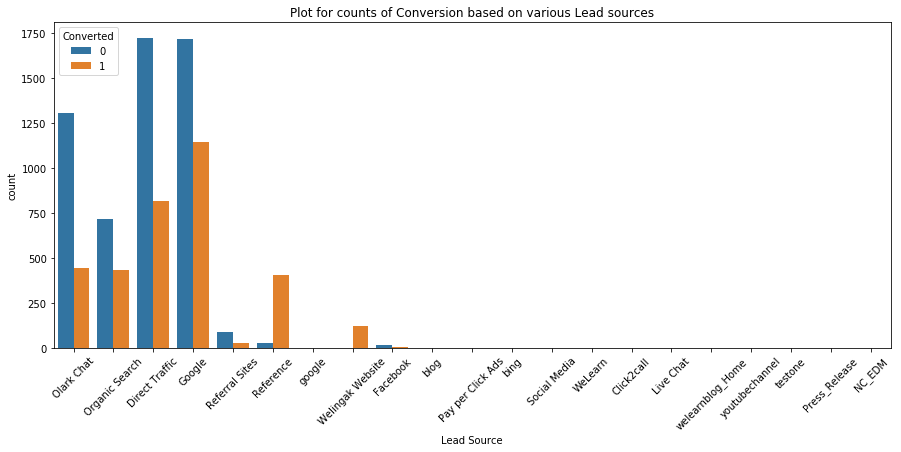

In [64]:
# Plot for counts of Conversion based on various Lead sources
plt.figure(figsize=(15,6))
plt.title("Plot for counts of Conversion based on various Lead sources")
sns.countplot(Leads['Lead Source'], hue=Leads['Converted'], data=Leads)
plt.xticks(rotation=45);

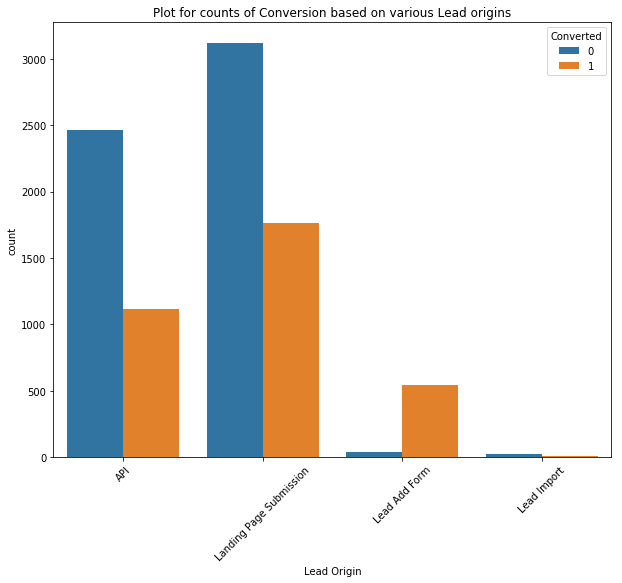

In [65]:
# Plot for counts of Conversion based on various Lead origins
plt.figure(figsize=(10, 8))
plt.title("Plot for counts of Conversion based on various Lead origins")
sns.countplot(Leads['Lead Origin'], hue=Leads['Converted'],data=Leads)
plt.xticks(rotation=45);

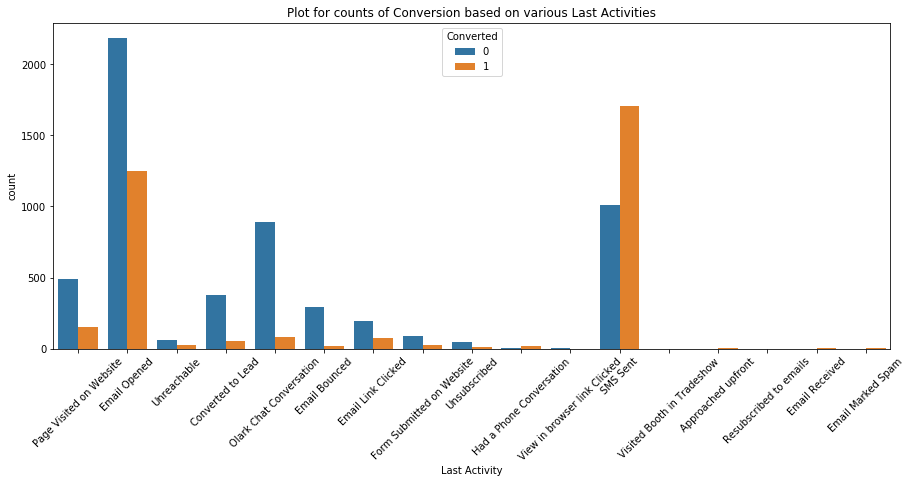

In [66]:
# Plot for counts of Conversion based on various Last Activities
plt.figure(figsize=(15,6))
plt.title("Plot for counts of Conversion based on various Last Activities")
sns.countplot(Leads['Last Activity'], hue=Leads['Converted'],data=Leads)
plt.xticks(rotation=45);

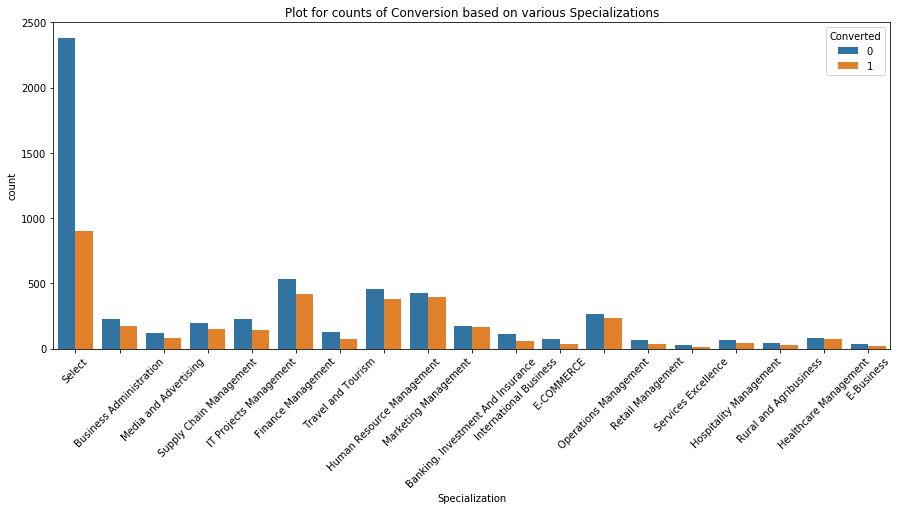

In [67]:
# Plot for counts of Conversion based on various Specializations
plt.figure(figsize=(15,6))
plt.title("Plot for counts of Conversion based on various Specializations")
sns.countplot(Leads['Specialization'], hue=Leads['Converted'],data=Leads)
plt.xticks(rotation=45);

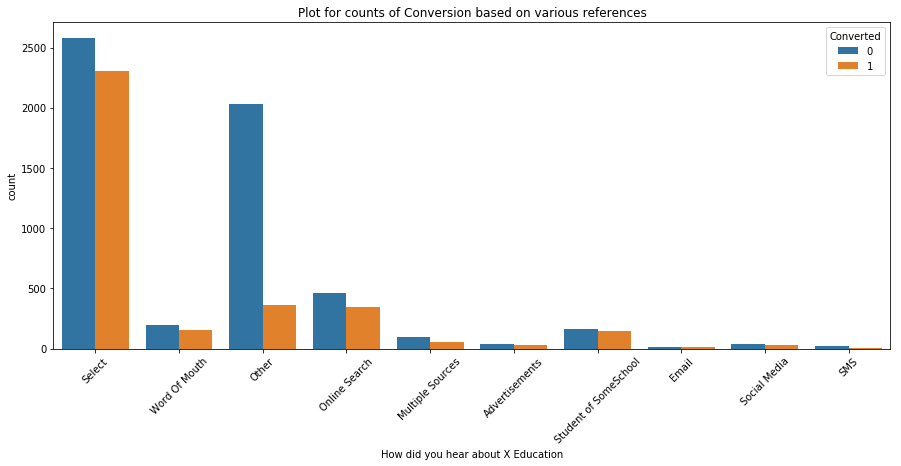

In [68]:
# Plot for counts of Conversion based on various references
plt.figure(figsize=(15,6))
plt.title("Plot for counts of Conversion based on various references")
sns.countplot(Leads['How did you hear about X Education'], hue=Leads['Converted'],data=Leads)
plt.xticks(rotation=45);

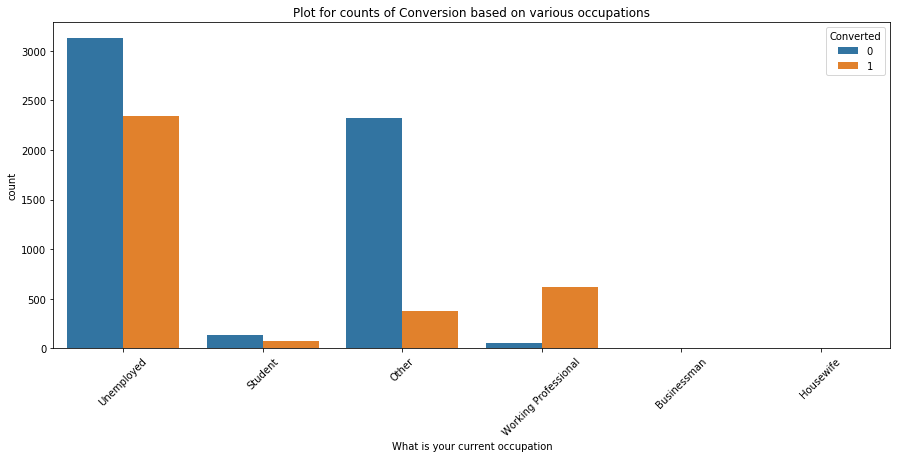

In [69]:
# Plot for counts of Conversion based on various occupations
plt.figure(figsize=(15,6))
plt.title("Plot for counts of Conversion based on various occupations")
sns.countplot(Leads['What is your current occupation'], hue=Leads['Converted'],data=Leads)
plt.xticks(rotation=45);

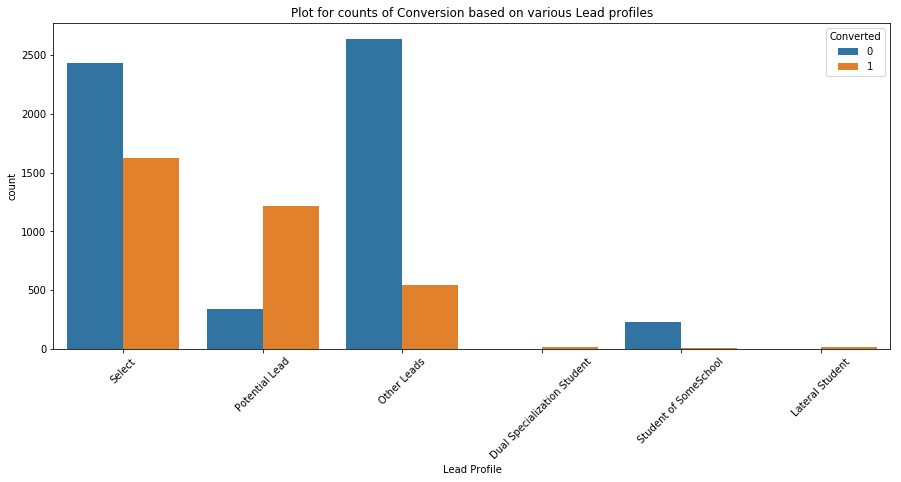

In [70]:
# Plot for counts of Conversion based on various Lead profiles
plt.figure(figsize=(15,6))
plt.title("Plot for counts of Conversion based on various Lead profiles")
sns.countplot(Leads['Lead Profile'], hue=Leads['Converted'],data=Leads)
plt.xticks(rotation=45);

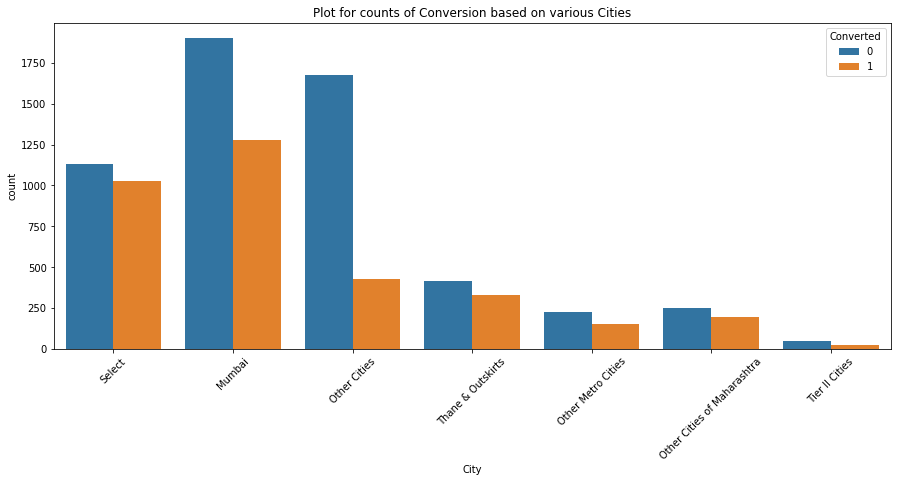

In [71]:
# Plot for counts of Conversion based on various Cities
plt.figure(figsize=(15,6))
plt.title("Plot for counts of Conversion based on various Cities")
sns.countplot(Leads['City'], hue=Leads['Converted'],data=Leads)
plt.xticks(rotation=45);

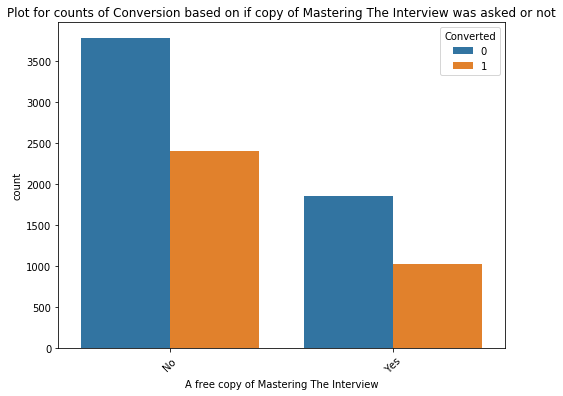

In [72]:
# Plot for counts of Conversion based on if copy of Mastering The Interview was asked or not
plt.figure(figsize=(8, 6))
plt.title("Plot for counts of Conversion based on if copy of Mastering The Interview was asked or not")
sns.countplot(Leads['A free copy of Mastering The Interview'], hue=Leads['Converted'],data=Leads)
plt.xticks(rotation=45);

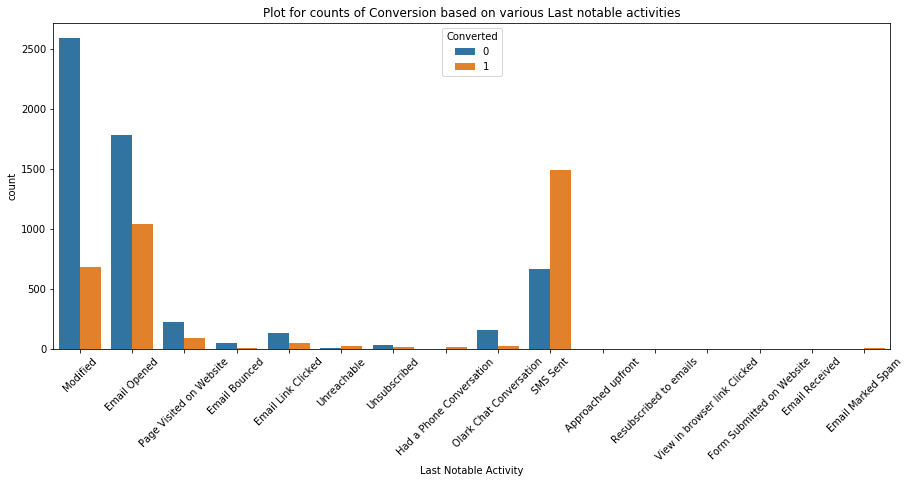

In [73]:
# Plot for counts of Conversion based on various Last notable activities
plt.figure(figsize=(15,6))
plt.title("Plot for counts of Conversion based on various Last notable activities")
sns.countplot(Leads['Last Notable Activity'], hue=Leads['Converted'],data=Leads)
plt.xticks(rotation=45);

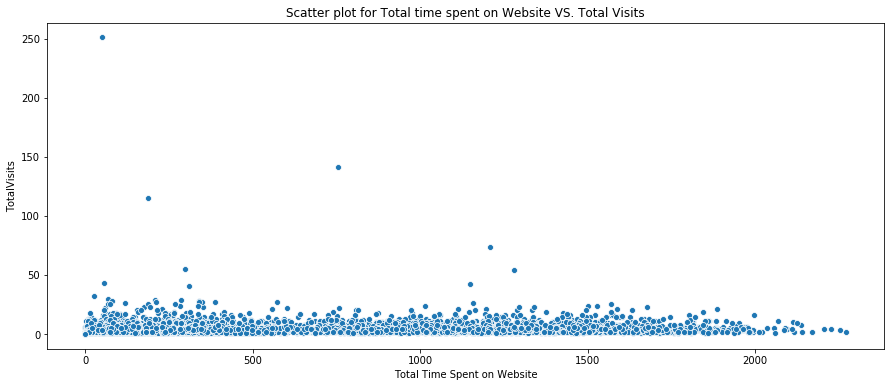

In [74]:
# Scatter plot for Total time spent on Website VS. Total Visits
plt.figure(figsize=(15,6))
plt.title("Scatter plot for Total time spent on Website VS. Total Visits")
sns.scatterplot(x=Leads['Total Time Spent on Website'], y = Leads['TotalVisits'], data=Leads);

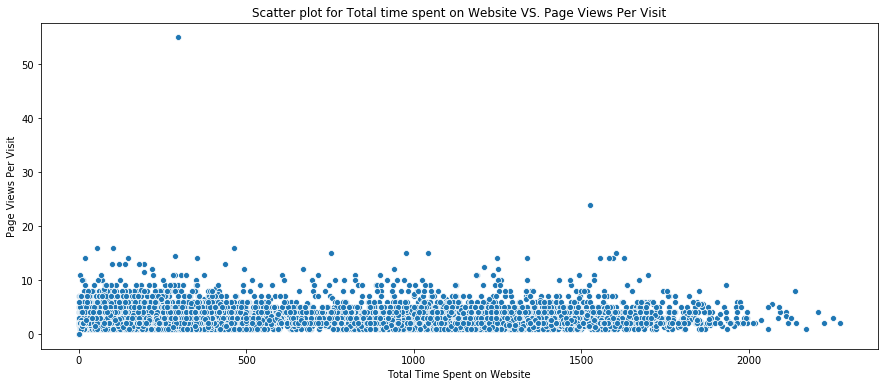

In [75]:
# Scatter plot for Total time spent on Website VS. Page Views Per Visit
plt.figure(figsize=(15,6))
plt.title("Scatter plot for Total time spent on Website VS. Page Views Per Visit")
sns.scatterplot(x=Leads['Total Time Spent on Website'], y = Leads['Page Views Per Visit'], data=Leads);

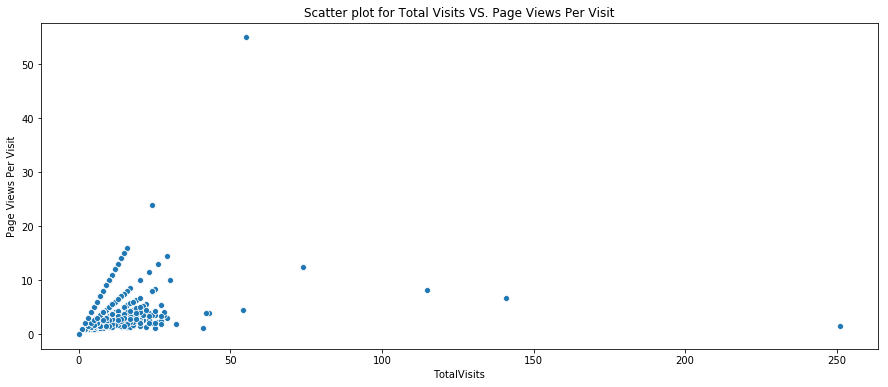

In [76]:
# Scatter plot for Total Visits VS. Page Views Per Visit
plt.figure(figsize=(15,6))
plt.title("Scatter plot for Total Visits VS. Page Views Per Visit")
sns.scatterplot(x=Leads['TotalVisits'], y = Leads['Page Views Per Visit'], data=Leads);

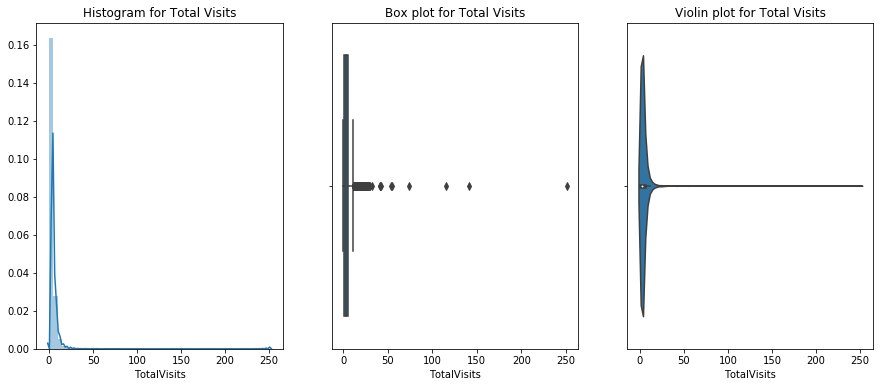

In [77]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.title("Histogram for Total Visits")
sns.distplot(Leads['TotalVisits'])

plt.subplot(1,3,2)
plt.title("Box plot for Total Visits")
sns.boxplot(Leads['TotalVisits'])

plt.subplot(1,3,3)
plt.title("Violin plot for Total Visits")
sns.violinplot(Leads['TotalVisits']);

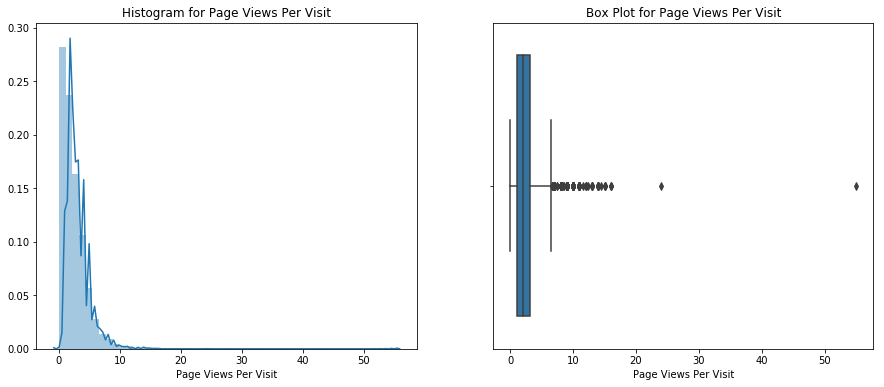

In [78]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Histogram for Page Views Per Visit")
sns.distplot(Leads['Page Views Per Visit'])

plt.subplot(1,2,2)
plt.title("Box Plot for Page Views Per Visit")
sns.boxplot(Leads['Page Views Per Visit'])
plt.show();

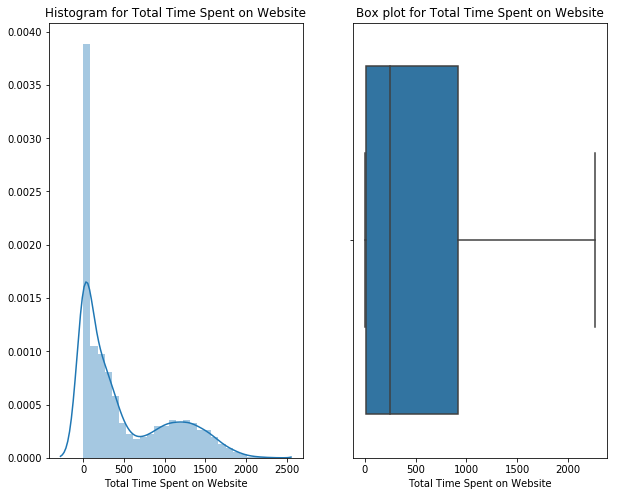

In [79]:
plt.figure(figsize=(10, 8))
plt.subplot(1,2,1)
plt.title("Histogram for Total Time Spent on Website")
sns.distplot(Leads['Total Time Spent on Website'])

plt.subplot(1,2,2)
plt.title("Box plot for Total Time Spent on Website")
sns.boxplot(Leads['Total Time Spent on Website']);

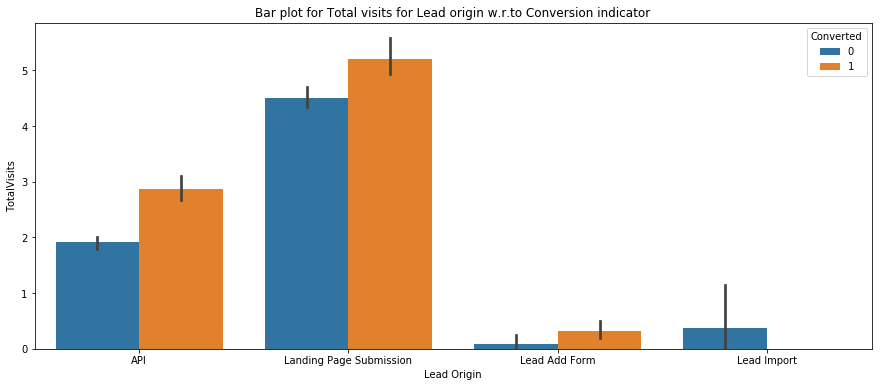

In [80]:
# Bar plot for Total visits for Lead origin w.r.to Conversion indicator
plt.figure(figsize=(15,6))
plt.title("Bar plot for Total visits for Lead origin w.r.to Conversion indicator")
sns.barplot(x = Leads['Lead Origin'], y = Leads['TotalVisits'], hue=Leads['Converted'], data = Leads);

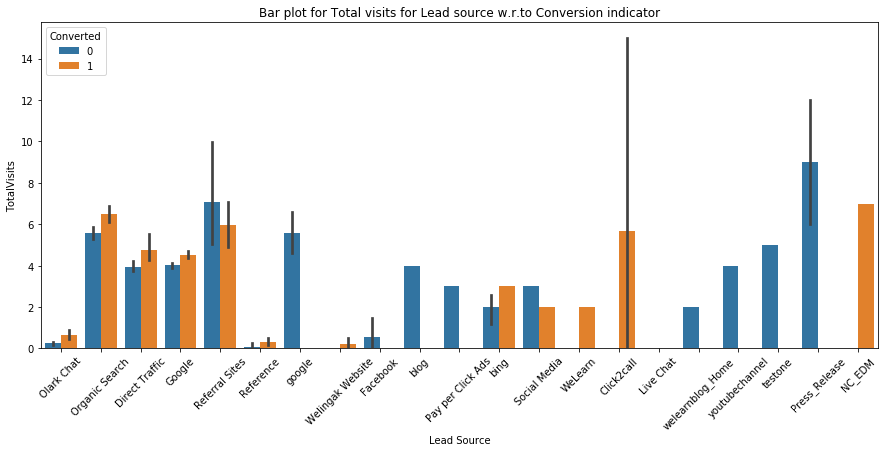

In [81]:
# Bar plot for Total visits for Lead source w.r.to Conversion indicator
plt.figure(figsize=(15,6))
plt.title("Bar plot for Total visits for Lead source w.r.to Conversion indicator")
sns.barplot(x = Leads['Lead Source'], y = Leads['TotalVisits'], hue=Leads['Converted'], data = Leads)
plt.xticks(rotation=45);

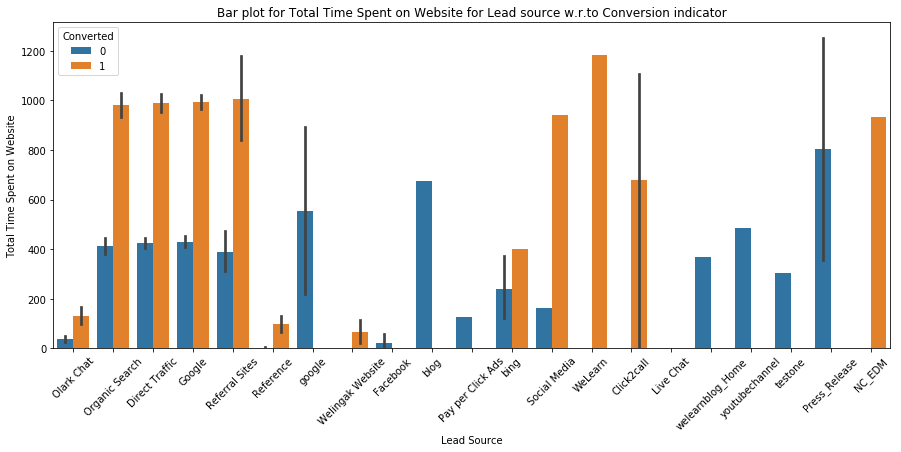

In [82]:
# Bar plot for Total Time Spent on Website for Lead source w.r.to Conversion indicator
plt.figure(figsize=(15,6))
plt.title("Bar plot for Total Time Spent on Website for Lead source w.r.to Conversion indicator")
sns.barplot(x = Leads['Lead Source'], y = Leads['Total Time Spent on Website'], hue=Leads['Converted'], data = Leads)
plt.xticks(rotation=45);

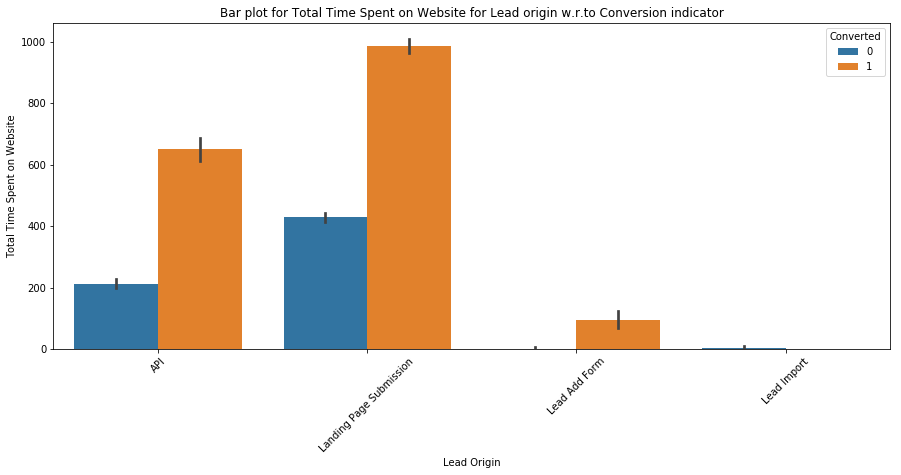

In [83]:
# Bar plot for Total Time Spent on Website for Lead origin w.r.to Conversion indicator
plt.figure(figsize=(15,6))
plt.title("Bar plot for Total Time Spent on Website for Lead origin w.r.to Conversion indicator")
sns.barplot(x = Leads['Lead Origin'], y = Leads['Total Time Spent on Website'], hue=Leads['Converted'], data = Leads)
plt.xticks(rotation=45);

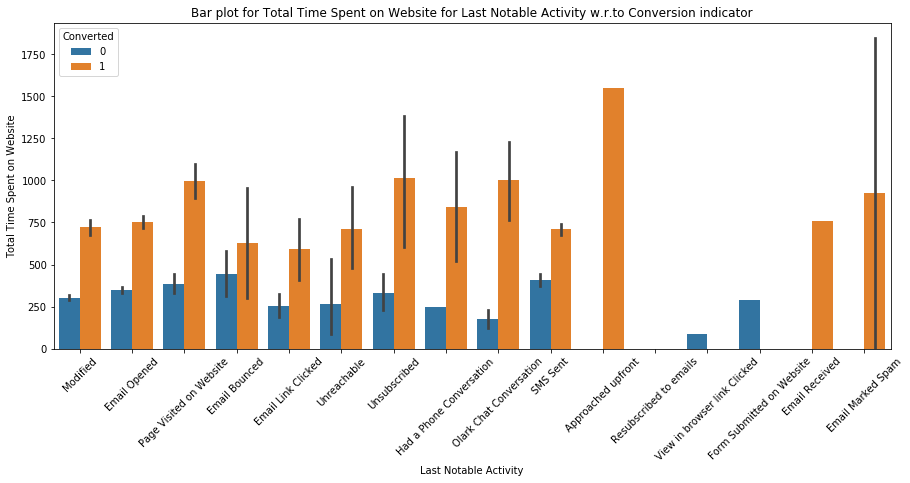

In [84]:
# Bar plot for Total Time Spent on Website for Last Notable Activity w.r.to Conversion indicator
plt.figure(figsize=(15,6))
plt.title("Bar plot for Total Time Spent on Website for Last Notable Activity w.r.to Conversion indicator")
sns.barplot(x = Leads['Last Notable Activity'], y = Leads['Total Time Spent on Website'], hue=Leads['Converted'], data = Leads)
plt.xticks(rotation=45);

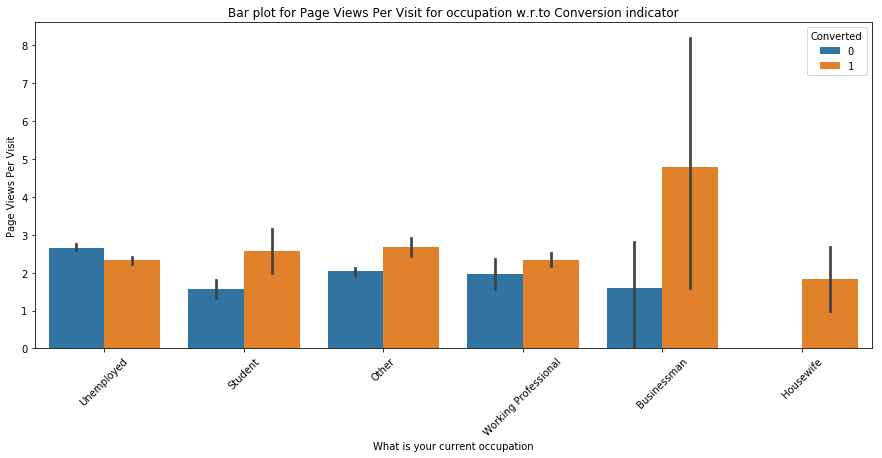

In [85]:
# Bar plot for Page Views Per Visit for occupation w.r.to Conversion indicator
plt.figure(figsize=(15,6))
plt.title("Bar plot for Page Views Per Visit for occupation w.r.to Conversion indicator")
sns.barplot(x = Leads['What is your current occupation'], y = Leads['Page Views Per Visit'], hue=Leads['Converted'], data = Leads)
plt.xticks(rotation=45);

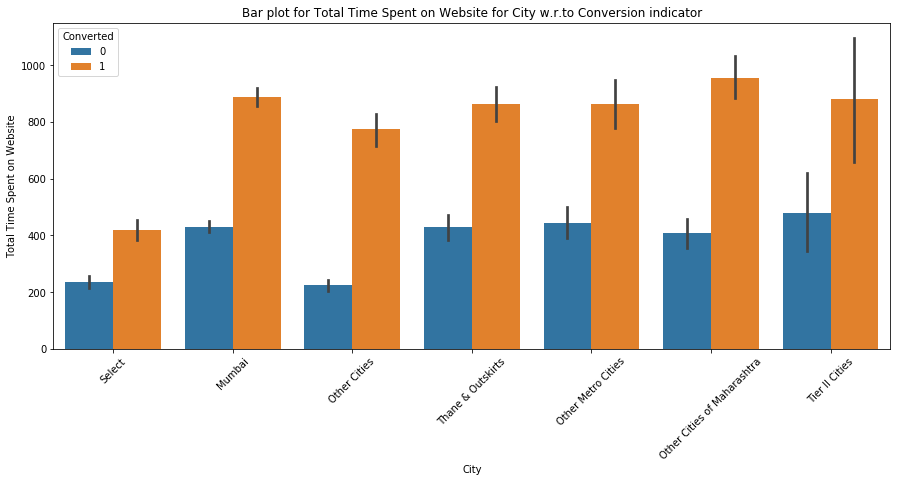

In [86]:
# Bar plot for Total Time Spent on Website for City w.r.to Conversion indicator
plt.figure(figsize=(15,6))
plt.title("Bar plot for Total Time Spent on Website for City w.r.to Conversion indicator")
sns.barplot(x = Leads['City'], y = Leads['Total Time Spent on Website'], hue=Leads['Converted'], data = Leads)
plt.xticks(rotation=45);

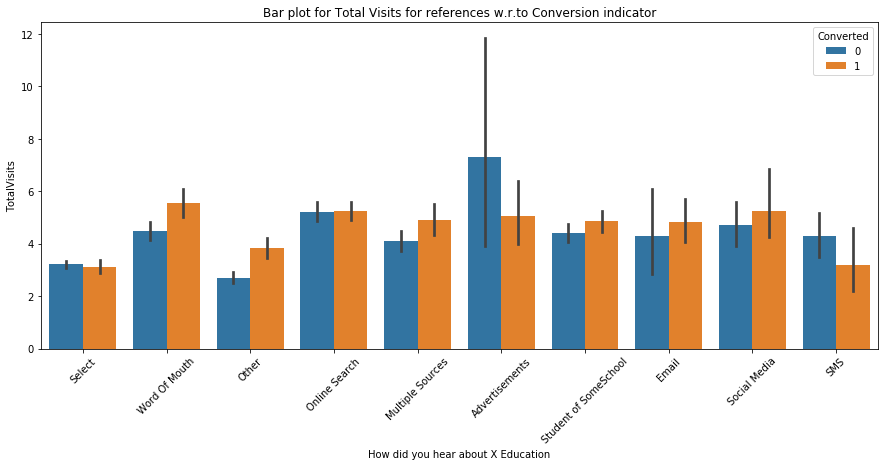

In [87]:
# Bar plot for Total Visits for references w.r.to Conversion indicator
plt.figure(figsize=(15,6))
plt.title("Bar plot for Total Visits for references w.r.to Conversion indicator")
sns.barplot(x = Leads['How did you hear about X Education'], y = Leads['TotalVisits'], hue=Leads['Converted'], data = Leads)
plt.xticks(rotation=45);

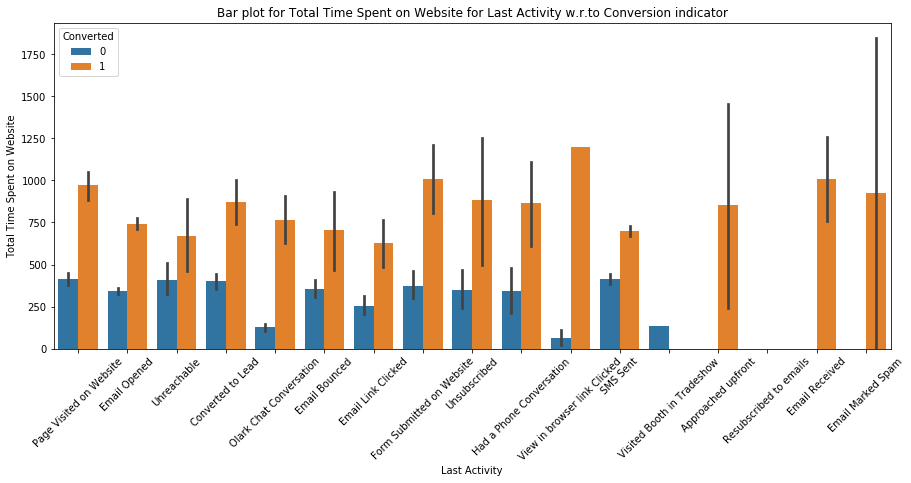

In [88]:
# Bar plot for Total Time Spent on Website for Last Activity w.r.to Conversion indicator
plt.figure(figsize=(15,6))
plt.title("Bar plot for Total Time Spent on Website for Last Activity w.r.to Conversion indicator")
sns.barplot(x = Leads['Last Activity'], y = Leads['Total Time Spent on Website'], hue=Leads['Converted'], data = Leads)
plt.xticks(rotation=45);

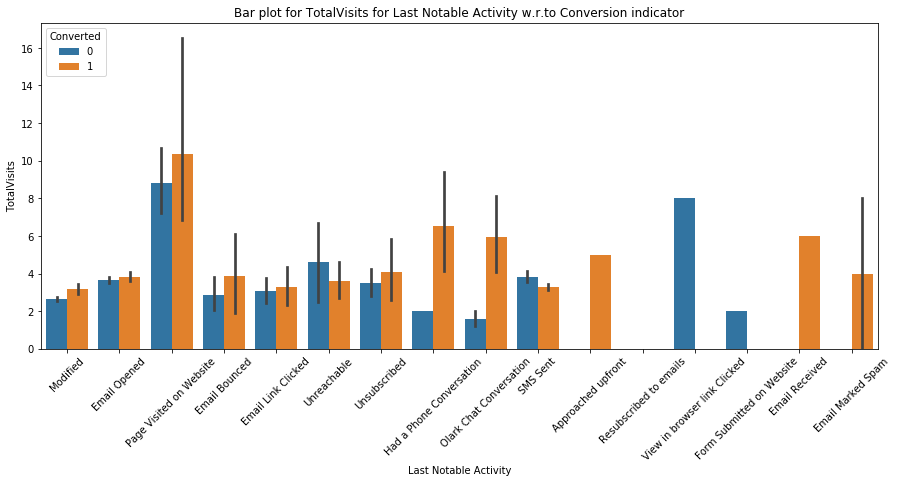

In [89]:
# Bar plot for TotalVisits for Last Notable Activity w.r.to Conversion indicator
plt.figure(figsize=(15,6))
plt.title("Bar plot for TotalVisits for Last Notable Activity w.r.to Conversion indicator")
sns.barplot(x = Leads['Last Notable Activity'], y = Leads['TotalVisits'], hue=Leads['Converted'], data = Leads)
plt.xticks(rotation=45);

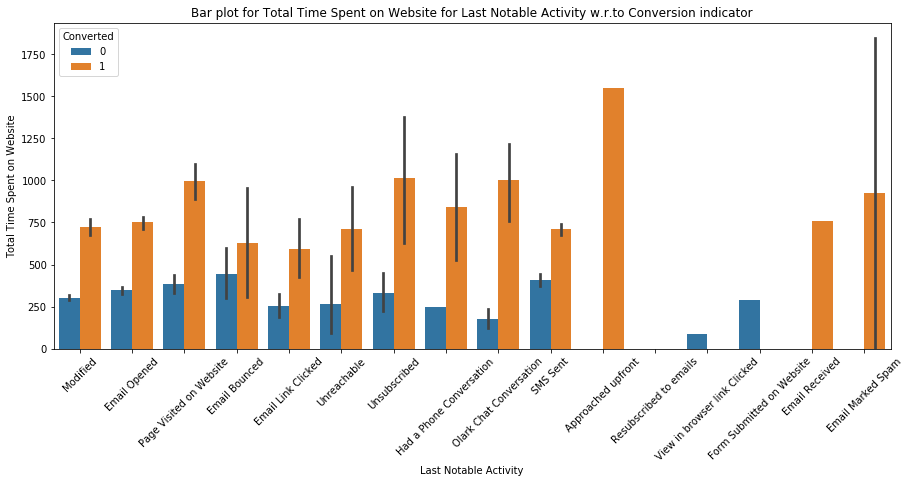

In [90]:
# Bar plot for Total Time Spent on Website for Last Notable Activity w.r.to Conversion indicator
plt.figure(figsize=(15,6))
plt.title("Bar plot for Total Time Spent on Website for Last Notable Activity w.r.to Conversion indicator")
sns.barplot(x = Leads['Last Notable Activity'], y = Leads['Total Time Spent on Website'], hue=Leads['Converted'], data = Leads)
plt.xticks(rotation=45);

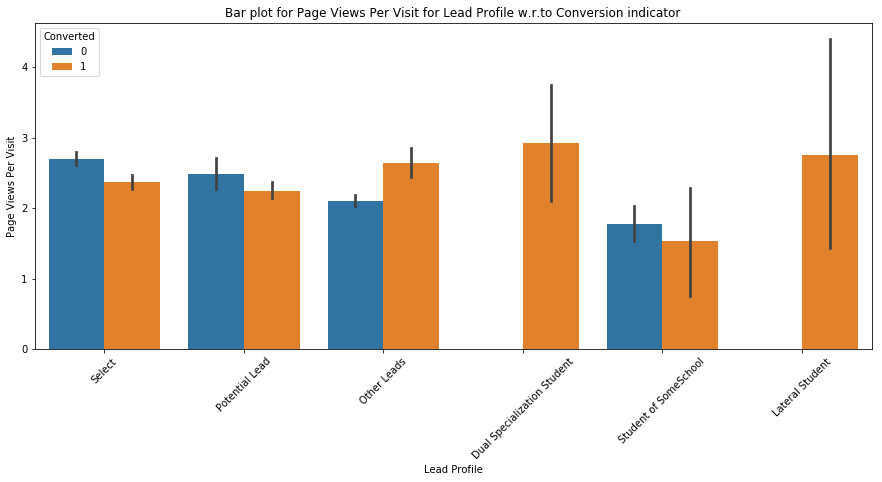

In [91]:
# Bar plot for Page Views Per Visit for Lead Profile w.r.to Conversion indicator
plt.figure(figsize=(15,6))
plt.title("Bar plot for Page Views Per Visit for Lead Profile w.r.to Conversion indicator")
sns.barplot(x = Leads['Lead Profile'], y = Leads['Page Views Per Visit'], hue=Leads['Converted'], data = Leads)
plt.xticks(rotation=45);

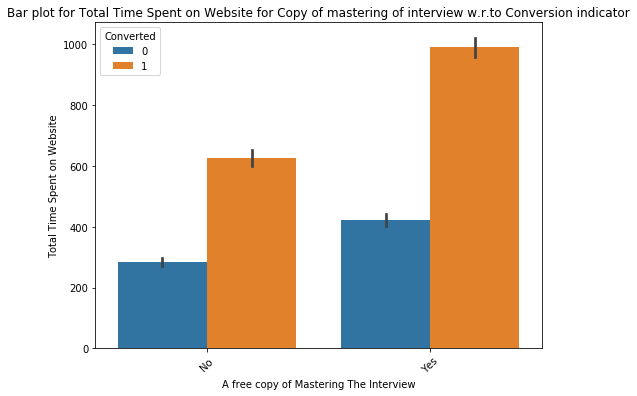

In [92]:
# Bar plot for Total Time Spent on Website for Copy of mastering of interview w.r.to Conversion indicator
plt.figure(figsize=(8,6))
plt.title("Bar plot for Total Time Spent on Website for Copy of mastering of interview w.r.to Conversion indicator")
sns.barplot(x = Leads['A free copy of Mastering The Interview'], y = Leads['Total Time Spent on Website'], hue=Leads['Converted'], data = Leads)
plt.xticks(rotation=45);

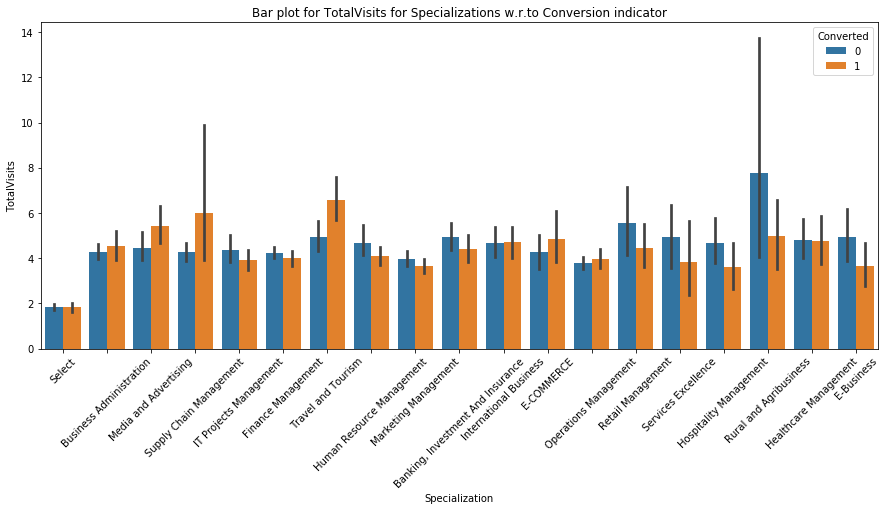

In [93]:
# Bar plot for TotalVisits for Specializations w.r.to Conversion indicator
plt.figure(figsize=(15,6))
plt.title("Bar plot for TotalVisits for Specializations w.r.to Conversion indicator")
sns.barplot(x = Leads['Specialization'], y = Leads['TotalVisits'], hue=Leads['Converted'], data = Leads)
plt.xticks(rotation=45);

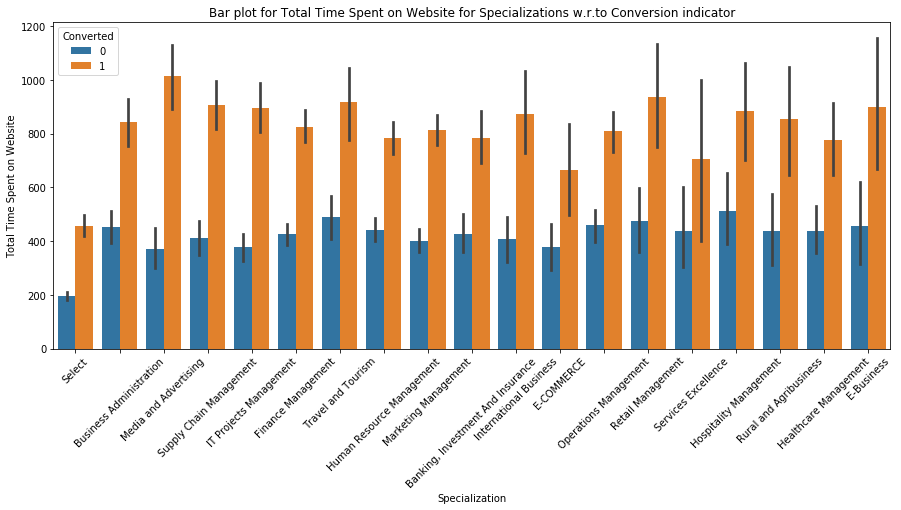

In [94]:
# Bar plot for TotalVisits for Specializations w.r.to Conversion indicator
plt.figure(figsize=(15,6))
plt.title("Bar plot for Total Time Spent on Website for Specializations w.r.to Conversion indicator")
sns.barplot(x = Leads['Specialization'], y = Leads['Total Time Spent on Website'], hue=Leads['Converted'], data = Leads)
plt.xticks(rotation=45);

Here is a Pair plot to see all the correlations amongst all the columns at one place

<Figure size 1296x1080 with 0 Axes>

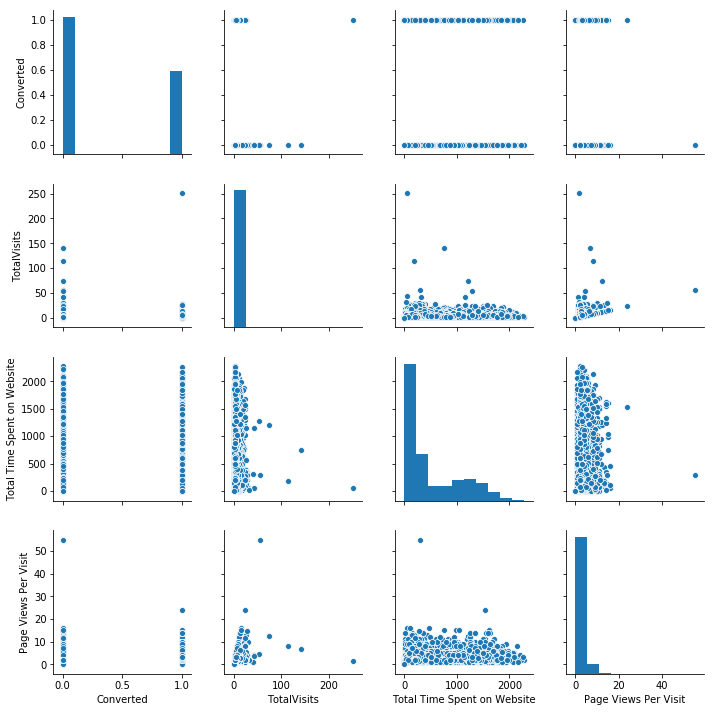

In [95]:
plt.figure(figsize=(18, 15))
sns.pairplot(Leads)
plt.xticks(rotation=45);

In [96]:
Leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


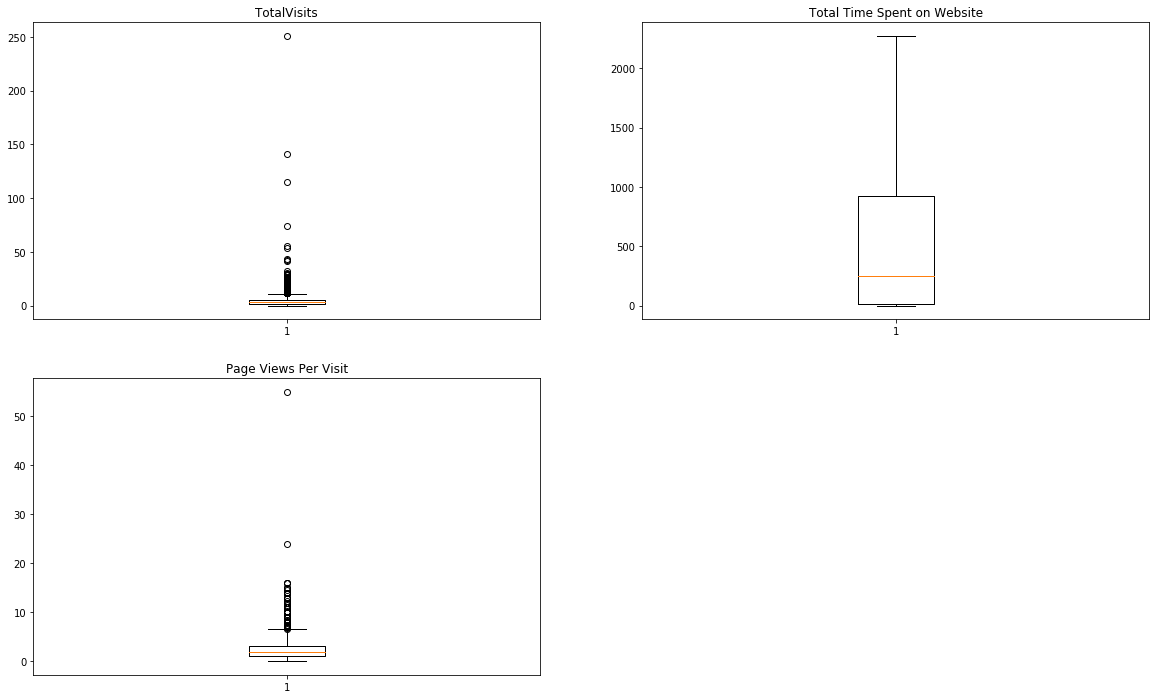

In [97]:
# Plotting the boxplot for all the variables

# subplot 1
plt.figure(figsize = (20,12))     
plt.subplot(2, 2, 1)
plt.title('TotalVisits')
plt.boxplot(Leads.TotalVisits);

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Total Time Spent on Website')
plt.boxplot(Leads['Total Time Spent on Website']);

# subplot 3
plt.subplot(2, 2, 3)
plt.title('Page Views Per Visit')
plt.boxplot(Leads['Page Views Per Visit']);

There are clearly some outliers in the columns `TotalVisits` and `Page Views Per Visit`. lets remove these outliers.

In [98]:
# outlier treatment for TotalVisits
Q1 = Leads.TotalVisits.quantile(0.25)
Q3 = Leads.TotalVisits.quantile(0.75)
IQR = Q3 - Q1
Leads = Leads[(Leads.TotalVisits >= Q1 - 1.5*IQR) & (Leads.TotalVisits <= Q3 + 1.5*IQR)]



# outlier treatment for Page Views Per Visit
Q1 = Leads['Page Views Per Visit'].quantile(0.25)
Q3 = Leads['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
Leads = Leads[(Leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (Leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

With the outlier treatment, we will also makesure that corresponding Lead Prospect ID and Number so that only the final ones are tagged backed to the score dataset

In [99]:
Lead_Prospect_ID = Lead_Prospect_ID[Lead_Prospect_ID.index.isin(Leads.index)]

In [100]:
Lead_Number = Lead_Number[Lead_Number.index.isin(Leads.index)]

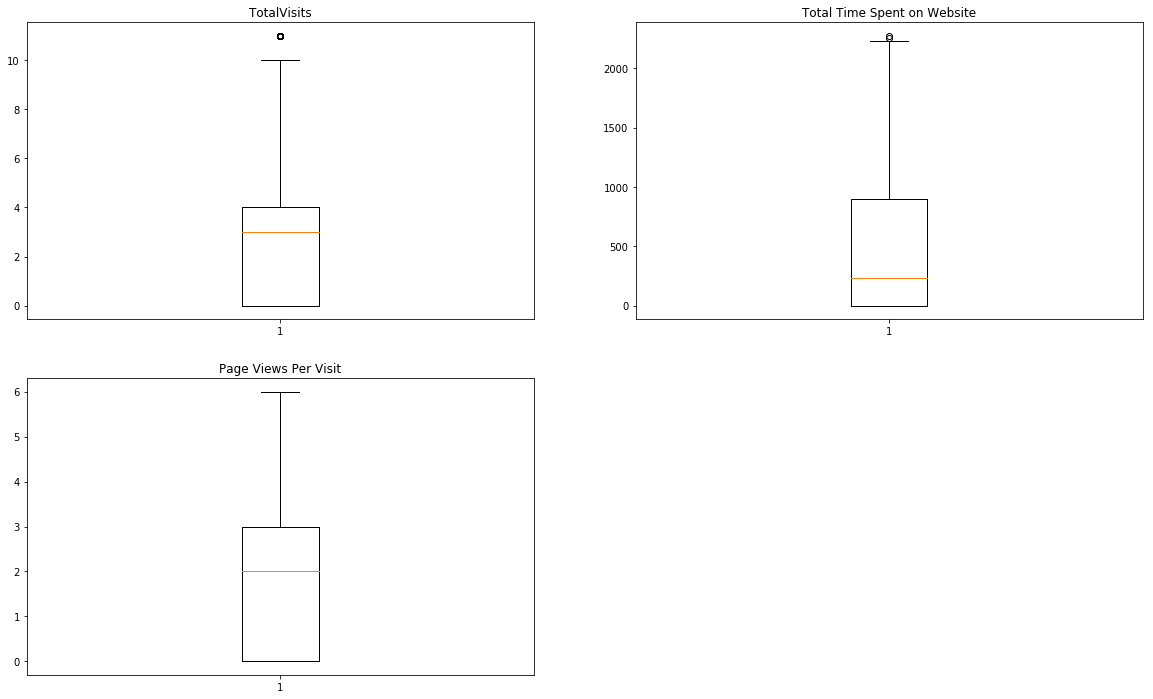

In [101]:
# Plotting the boxplot for all the variables after the outliers treatment

# subplot 1
plt.figure(figsize = (20,12))     
plt.subplot(2, 2, 1)
plt.title('TotalVisits')
plt.boxplot(Leads.TotalVisits);

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Total Time Spent on Website')
plt.boxplot(Leads['Total Time Spent on Website']);

# subplot 3
plt.subplot(2, 2, 3)
plt.title('Page Views Per Visit')
plt.boxplot(Leads['Page Views Per Visit']);

Now out dataset is free of outliers.

# Step 4: Data Preparation

### Converting some binary variables (Yes/No) to 0/1

In [102]:
Leads['A free copy of Mastering The Interview'] = Leads['A free copy of Mastering The Interview'].map({'Yes': 1, "No": 0})

In [103]:
Leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Select,Select,0,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Select,Select,0,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Potential Lead,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Select,Mumbai,0,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Select,Mumbai,0,Modified


### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [104]:
# Creating dummy variables for the variable 'Lead Origin'
lo = pd.get_dummies(Leads['Lead Origin'], prefix='Lead Origin')

In [105]:
# Dropping Lead Origin_Lead Import column
lo = lo.drop(['Lead Origin_Lead Import'], 1)

In [106]:
#Adding the results to the master dataframe
Leads = pd.concat([Leads,lo], axis=1)

In [107]:
# Dropping Lead Origin column from Lead dataframe
Leads = Leads.drop(['Lead Origin'], 1)

In [108]:
Leads.head()

,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form
0,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Select,Select,0,Modified,1,0,0
1,Organic Search,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Select,Select,0,Email Opened,1,0,0
2,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Potential Lead,Mumbai,1,Email Opened,0,1,0
3,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Select,Mumbai,0,Modified,0,1,0
4,Google,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Select,Mumbai,0,Modified,0,1,0


In [109]:
# Creating dummy variables for the variable 'Lead Source'
lo = pd.get_dummies(Leads['Lead Source'], prefix='Lead Source')

# Dropping Lead Source_testone column
lo = lo.drop(['Lead Source_testone'], 1)

#Adding the results to the master dataframe
Leads = pd.concat([Leads,lo], axis=1)

# Dropping Lead Origin column from Lead dataframe
Leads = Leads.drop(['Lead Source'], 1)


In [110]:
Leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Lead Profile,City,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_welearnblog_Home,Lead Source_youtubechannel
0,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Select,Select,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Select,Select,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Potential Lead,Mumbai,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Select,Mumbai,...,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Select,Mumbai,...,0,0,0,0,0,0,0,0,0,0


In [111]:
# Creating dummy variables for the variable 'Last Activity'
lo = pd.get_dummies(Leads['Last Activity'], prefix='Last Activity')

# Dropping Last Activity_Visited Booth column
lo = lo.drop(['Last Activity_Visited Booth in Tradeshow'], 1)

#Adding the results to the master dataframe
Leads = pd.concat([Leads,lo], axis=1)

# Dropping Last Activity column from Lead dataframe
Leads = Leads.drop(['Last Activity'], 1)

In [112]:
# Creating dummy variables for the variable 'Specialization'
lo = pd.get_dummies(Leads['Specialization'], prefix='Specialization')

# Dropping Specialization_Select column
lo = lo.drop(['Specialization_Select'], 1)

#Adding the results to the master dataframe
Leads = pd.concat([Leads,lo], axis=1)

# Dropping Specialization column from Lead dataframe
Leads = Leads.drop(['Specialization'], 1)

In [113]:
# Creating dummy variables for the variable 'How did you hear about X Education'
lo = pd.get_dummies(Leads['How did you hear about X Education'], prefix='How did you hear about X Education')

# Dropping How did you hear about X Education_Select column
lo = lo.drop(['How did you hear about X Education_Select'], 1)

#Adding the results to the master dataframe
Leads = pd.concat([Leads,lo], axis=1)

# Dropping How did you hear about X Education column from Lead dataframe
Leads = Leads.drop(['How did you hear about X Education'], 1)

In [114]:
# Creating dummy variables for the variable 'What is your current occupation'
lo = pd.get_dummies(Leads['What is your current occupation'], prefix='What is your current occupation')

# Dropping What is your current occupation_Businessman column
lo = lo.drop(['What is your current occupation_Businessman'], 1)

#Adding the results to the master dataframe
Leads = pd.concat([Leads,lo], axis=1)

# Dropping How did you hear about X Education column from Lead dataframe
Leads = Leads.drop(['What is your current occupation'], 1)

In [115]:
# Creating dummy variables for the variable 'Lead Profile'
lo = pd.get_dummies(Leads['Lead Profile'], prefix='Lead Profile')

# Dropping Lead Profile_Select column
lo = lo.drop(['Lead Profile_Select'], 1)

#Adding the results to the master dataframe
Leads = pd.concat([Leads,lo], axis=1)

# Dropping How did you hear about X Education column from Lead dataframe
Leads = Leads.drop(['Lead Profile'], 1)

In [116]:
# Creating dummy variables for the variable 'City'
lo = pd.get_dummies(Leads['City'], prefix='City')

# Dropping City_Select column
lo = lo.drop(['City_Select'], 1)

#Adding the results to the master dataframe
Leads = pd.concat([Leads,lo], axis=1)

# Dropping How did you hear about X Education column from Lead dataframe
Leads = Leads.drop(['City'], 1)

In [117]:
# Creating dummy variables for the variable 'Last Notable Activity'
lo = pd.get_dummies(Leads['Last Notable Activity'], prefix='Last Notable Activity')

# Dropping Last Notable Activity_Resubscribed to emails column
lo = lo.drop(['Last Notable Activity_Resubscribed to emails'], 1)

#Adding the results to the master dataframe
Leads = pd.concat([Leads,lo], axis=1)

# Dropping How did you hear about X Education column from Lead dataframe
Leads = Leads.drop(['Last Notable Activity'], 1)

In [118]:
Leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [119]:
Leads.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Click2call',
       'Lead Source_Direct Traffic',
       ...
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=102)

In [120]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8513 entries, 0 to 9239
Columns: 102 entries, Converted to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int64(3), uint8(97)
memory usage: 1.2 MB


# Step 5: Test-Train Split

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
# Putting feature variable to X
X = Leads.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [123]:
# Putting response variable to y
y = Leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [124]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100, stratify= y)

# Step 6: Feature Scaling

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                    'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7595,-0.340215,1.113609,-0.658664,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3337,-1.168884,-0.876513,-1.259508,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5500,2.145793,0.122200,0.344746,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1572,-1.168884,-0.876513,-1.259508,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5488,-0.754549,0.036387,-0.658664,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [127]:
### Checking the conversion Rate
conversion = (sum(Leads['Converted'])/len(Leads['Converted'].index))*100
conversion

37.66004933630918

We have almost 37% conversion rate

# Step 7: Model Building
# Feature Selection Using RFE

In [128]:
import statsmodels.api as sm

In [129]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [130]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [131]:
rfe.support_

array([False,  True, False, False, False,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False,  True,  True,  True, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True,  True,
       False, False])

In [132]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 27),
 ('A free copy of Mastering The Interview', False, 76),
 ('Lead Origin_API', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Click2call', False, 6),
 ('Lead Source_Direct Traffic', False, 16),
 ('Lead Source_Facebook', False, 20),
 ('Lead Source_Google', False, 19),
 ('Lead Source_Live Chat', False, 38),
 ('Lead Source_NC_EDM', False, 77),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 17),
 ('Lead Source_Pay per Click Ads', False, 82),
 ('Lead Source_Press_Release', False, 75),
 ('Lead Source_Reference', False, 13),
 ('Lead Source_Referral Sites', False, 18),
 ('Lead Source_Social Media', False, 24),
 ('Lead Source_WeLearn', False, 79),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 46),
 ('Lead Source_blog', False, 81),
 ('Lead Source_google', False, 1

In [133]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Approached upfront',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Lead Profile_Dual Specialization Student',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

#### Assessing the model with StatsModels

#### Model 1

In [134]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5938
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2232.8
Date:                Sat, 02 Mar 2019   Deviance:                       4465.6
Time:                        20:38:45   Pearson chi2:                 5.90e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2047      0.096    -12.506      0.000      -1.394      -1.016
Total Time Spent on Website                              1.0850      0.044     24.818      0.000       0.999       1.171
Lead Origin_Landing Page Submission                     -0.3927      0.098     -4.009      0.000      -0.585      -0.201
Lead Origin_Lead Add Form                                2.8808      0.246     11.726      0.000       2.399       3.362
Lead Source_Olark Chat                                   1.1302      0.130      8.694      0.000       0.875       1.385
Lead Source_Welingak Website                             3.2155      1.035      3.106      0.002       1.187       5.244
Last Activity_Approached upfront                        23.7418   4.32e+04      0.001      1.000   -8.46e+04    8.46e+04
Last Activity_Converted to Lead                         -1.2643      0.235     -5.382      0.000      -1.725      -0.804
Last Activity_Email Bounced                             -2.1443      0.394     -5.445      0.000      -2.916      -1.372
Last Activity_Had a Phone Conversation                   1.0293      1.001      1.028      0.304      -0.933       2.992
Last Activity_Olark Chat Conversation                   -1.3465      0.175     -7.711      0.000      -1.689      -1.004
What is your current occupation_Housewife               24.2266   2.72e+04      0.001      0.999   -5.34e+04    5.34e+04
What is your current occupation_Other                   -0.8764      0.095     -9.178      0.000      -1.064      -0.689
What is your current occupation_Working Professional     2.3076      0.204     11.293      0.000       1.907       2.708
Lead Profile_Dual Specialization Student                23.0098   2.16e+04      0.001      0.999   -4.23e+04    4.23e+04
Lead Profile_Lateral Student                            23.2325   1.86e+04      0.001      0.999   -3.64e+04    3.64e+04
Lead Profile_Potential Lead                              1.6198      0.107     15.068      0.000       1.409       1.831
Lead Profile_Student of SomeSchool                      -1.9762      0.423     -4.677      0.000      -2.804      -1.148
Last Notable Activity_Had a Phone Conversation           2.1712      1.566      1.387      0.165      -0.897       5.240
Last Notable Activity_SMS Sent                           1.4766      0.086     17.125      0.000       1.308       1.646
Last Notable Activity_Unreachable                        1.0806      0.575      1.881      0.060      -0.045       2.207
========================================================================================================================
"""

The column `Last Activity_Approached upfront` is insignificant as p value is greater than 0.05.
So dropping the column from the model

In [135]:
col = col.drop('Last Activity_Approached upfront', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Lead Profile_Dual Specialization Student',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

#### Model 2

In [136]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5939
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2235.1
Date:                Sat, 02 Mar 2019   Deviance:                       4470.2
Time:                        20:39:09   Pearson chi2:                 5.90e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2021      0.096    -12.480      0.000      -1.391      -1.013
Total Time Spent on Website                              1.0868      0.044     24.868      0.000       1.001       1.172
Lead Origin_Landing Page Submission                     -0.3910      0.098     -3.992      0.000      -0.583      -0.199
Lead Origin_Lead Add Form                                2.8820      0.246     11.733      0.000       2.401       3.363
Lead Source_Olark Chat                                   1.1381      0.130      8.759      0.000       0.883       1.393
Lead Source_Welingak Website                             3.2143      1.035      3.105      0.002       1.185       5.243
Last Activity_Converted to Lead                         -1.2674      0.235     -5.395      0.000      -1.728      -0.807
Last Activity_Email Bounced                             -2.1481      0.394     -5.455      0.000      -2.920      -1.376
Last Activity_Had a Phone Conversation                   1.0265      1.002      1.025      0.305      -0.937       2.990
Last Activity_Olark Chat Conversation                   -1.3516      0.175     -7.742      0.000      -1.694      -1.009
What is your current occupation_Housewife               24.2233   2.72e+04      0.001      0.999   -5.34e+04    5.34e+04
What is your current occupation_Other                   -0.8811      0.095     -9.231      0.000      -1.068      -0.694
What is your current occupation_Working Professional     2.3052      0.204     11.281      0.000       1.905       2.706
Lead Profile_Dual Specialization Student                23.0040   2.16e+04      0.001      0.999   -4.23e+04    4.23e+04
Lead Profile_Lateral Student                            23.2283   1.86e+04      0.001      0.999   -3.64e+04    3.64e+04
Lead Profile_Potential Lead                              1.6162      0.107     15.038      0.000       1.406       1.827
Lead Profile_Student of SomeSchool                      -1.9820      0.423     -4.691      0.000      -2.810      -1.154
Last Notable Activity_Had a Phone Conversation           2.1719      1.566      1.387      0.165      -0.897       5.241
Last Notable Activity_SMS Sent                           1.4726      0.086     17.087      0.000       1.304       1.642
Last Notable Activity_Unreachable                        1.0786      0.575      1.877      0.060      -0.048       2.205
========================================================================================================================
"""

The column `Lead Profile_Dual Specialization Student` is insignificant as p value is greater than 0.05. So dropping the column from the model

In [137]:
col = col.drop('Lead Profile_Dual Specialization Student', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

#### Model 3

In [138]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5940
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2240.1
Date:                Sat, 02 Mar 2019   Deviance:                       4480.1
Time:                        20:39:21   Pearson chi2:                 5.93e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1918      0.096    -12.403      0.000      -1.380      -1.004
Total Time Spent on Website                              1.0895      0.044     24.927      0.000       1.004       1.175
Lead Origin_Landing Page Submission                     -0.3950      0.098     -4.040      0.000      -0.587      -0.203
Lead Origin_Lead Add Form                                2.8767      0.246     11.716      0.000       2.395       3.358
Lead Source_Olark Chat                                   1.1443      0.130      8.820      0.000       0.890       1.399
Lead Source_Welingak Website                             3.2131      1.035      3.104      0.002       1.184       5.242
Last Activity_Converted to Lead                         -1.2758      0.235     -5.425      0.000      -1.737      -0.815
Last Activity_Email Bounced                             -2.1577      0.394     -5.474      0.000      -2.930      -1.385
Last Activity_Had a Phone Conversation                   1.0187      1.003      1.016      0.310      -0.946       2.984
Last Activity_Olark Chat Conversation                   -1.3609      0.175     -7.795      0.000      -1.703      -1.019
What is your current occupation_Housewife               24.2188   2.72e+04      0.001      0.999   -5.34e+04    5.34e+04
What is your current occupation_Other                   -0.8899      0.095     -9.328      0.000      -1.077      -0.703
What is your current occupation_Working Professional     2.3300      0.204     11.441      0.000       1.931       2.729
Lead Profile_Lateral Student                            23.2189   1.86e+04      0.001      0.999   -3.63e+04    3.64e+04
Lead Profile_Potential Lead                              1.6082      0.107     14.964      0.000       1.398       1.819
Lead Profile_Student of SomeSchool                      -1.9935      0.423     -4.715      0.000      -2.822      -1.165
Last Notable Activity_Had a Phone Conversation           2.1770      1.567      1.389      0.165      -0.895       5.249
Last Notable Activity_SMS Sent                           1.4684      0.086     17.056      0.000       1.300       1.637
Last Notable Activity_Unreachable                        1.0740      0.575      1.868      0.062      -0.053       2.201
========================================================================================================================
"""

The column `Lead Profile_Lateral Student` is insignificant as p value is greater than 0.05. So dropping the column from the model

In [139]:
col = col.drop('Lead Profile_Lateral Student', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Lead Profile_Potential Lead', 'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

#### Model 4

In [140]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5941
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2246.4
Date:                Sat, 02 Mar 2019   Deviance:                       4492.8
Time:                        20:39:31   Pearson chi2:                 5.95e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1819      0.096    -12.325      0.000      -1.370      -0.994
Total Time Spent on Website                              1.0920      0.044     25.026      0.000       1.006       1.178
Lead Origin_Landing Page Submission                     -0.3926      0.098     -4.022      0.000      -0.584      -0.201
Lead Origin_Lead Add Form                                2.9178      0.245     11.913      0.000       2.438       3.398
Lead Source_Olark Chat                                   1.1447      0.130      8.836      0.000       0.891       1.399
Lead Source_Welingak Website                             3.1664      1.035      3.059      0.002       1.138       5.195
Last Activity_Converted to Lead                         -1.2854      0.235     -5.465      0.000      -1.746      -0.824
Last Activity_Email Bounced                             -2.1666      0.394     -5.496      0.000      -2.939      -1.394
Last Activity_Had a Phone Conversation                   1.1405      0.966      1.180      0.238      -0.753       3.034
Last Activity_Olark Chat Conversation                   -1.3658      0.175     -7.822      0.000      -1.708      -1.024
What is your current occupation_Housewife               23.2072   1.65e+04      0.001      0.999   -3.24e+04    3.24e+04
What is your current occupation_Other                   -0.8989      0.095     -9.430      0.000      -1.086      -0.712
What is your current occupation_Working Professional     2.3372      0.203     11.501      0.000       1.939       2.736
Lead Profile_Potential Lead                              1.5959      0.107     14.859      0.000       1.385       1.806
Lead Profile_Student of SomeSchool                      -2.0072      0.423     -4.742      0.000      -2.837      -1.178
Last Notable Activity_Had a Phone Conversation           2.0471      1.545      1.325      0.185      -0.981       5.075
Last Notable Activity_SMS Sent                           1.4593      0.086     16.968      0.000       1.291       1.628
Last Notable Activity_Unreachable                        1.0678      0.575      1.856      0.064      -0.060       2.196
========================================================================================================================
"""

The column `What is your current occupation_Housewife` is insignificant as p value is greater than 0.05. So dropping the column from the model

In [141]:
col = col.drop('What is your current occupation_Housewife', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Lead Profile_Potential Lead', 'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

#### Model 5

In [142]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5942
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2251.5
Date:                Sat, 02 Mar 2019   Deviance:                       4503.1
Time:                        20:39:42   Pearson chi2:                 5.96e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1764      0.096    -12.282      0.000      -1.364      -0.989
Total Time Spent on Website                              1.0910      0.044     25.038      0.000       1.006       1.176
Lead Origin_Landing Page Submission                     -0.3870      0.097     -3.970      0.000      -0.578      -0.196
Lead Origin_Lead Add Form                                2.9303      0.245     11.973      0.000       2.451       3.410
Lead Source_Olark Chat                                   1.1431      0.129      8.829      0.000       0.889       1.397
Lead Source_Welingak Website                             3.1491      1.035      3.043      0.002       1.121       5.177
Last Activity_Converted to Lead                         -1.2917      0.235     -5.494      0.000      -1.752      -0.831
Last Activity_Email Bounced                             -2.1726      0.394     -5.513      0.000      -2.945      -1.400
Last Activity_Had a Phone Conversation                   1.1332      0.966      1.173      0.241      -0.761       3.027
Last Activity_Olark Chat Conversation                   -1.3684      0.175     -7.839      0.000      -1.711      -1.026
What is your current occupation_Other                   -0.9039      0.095     -9.489      0.000      -1.091      -0.717
What is your current occupation_Working Professional     2.3307      0.203     11.472      0.000       1.933       2.729
Lead Profile_Potential Lead                              1.5928      0.107     14.852      0.000       1.383       1.803
Lead Profile_Student of SomeSchool                      -2.0144      0.423     -4.758      0.000      -2.844      -1.185
Last Notable Activity_Had a Phone Conversation           2.0452      1.545      1.324      0.186      -0.983       5.073
Last Notable Activity_SMS Sent                           1.4518      0.086     16.899      0.000       1.283       1.620
Last Notable Activity_Unreachable                        1.0623      0.575      1.846      0.065      -0.066       2.190
========================================================================================================================
"""

The column `Last Activity_Had a Phone Conversation	` is insignificant as p value is greater than 0.05. So dropping the column from the model

In [143]:
col = col.drop('Last Activity_Had a Phone Conversation', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Lead Profile_Potential Lead', 'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

#### Model 6

In [144]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5943
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2252.3
Date:                Sat, 02 Mar 2019   Deviance:                       4504.6
Time:                        20:40:01   Pearson chi2:                 5.97e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1727      0.096    -12.255      0.000      -1.360      -0.985
Total Time Spent on Website                              1.0916      0.044     25.057      0.000       1.006       1.177
Lead Origin_Landing Page Submission                     -0.3880      0.097     -3.981      0.000      -0.579      -0.197
Lead Origin_Lead Add Form                                2.9368      0.245     11.999      0.000       2.457       3.417
Lead Source_Olark Chat                                   1.1410      0.129      8.816      0.000       0.887       1.395
Lead Source_Welingak Website                             3.1400      1.035      3.034      0.002       1.112       5.168
Last Activity_Converted to Lead                         -1.2955      0.235     -5.510      0.000      -1.756      -0.835
Last Activity_Email Bounced                             -2.1760      0.394     -5.521      0.000      -2.948      -1.404
Last Activity_Olark Chat Conversation                   -1.3707      0.175     -7.851      0.000      -1.713      -1.028
What is your current occupation_Other                   -0.9040      0.095     -9.493      0.000      -1.091      -0.717
What is your current occupation_Working Professional     2.3343      0.203     11.494      0.000       1.936       2.732
Lead Profile_Potential Lead                              1.5926      0.107     14.849      0.000       1.382       1.803
Lead Profile_Student of SomeSchool                      -2.0176      0.423     -4.764      0.000      -2.848      -1.188
Last Notable Activity_Had a Phone Conversation           3.1757      1.207      2.631      0.009       0.810       5.542
Last Notable Activity_SMS Sent                           1.4487      0.086     16.871      0.000       1.280       1.617
Last Notable Activity_Unreachable                        1.0591      0.576      1.840      0.066      -0.069       2.187
========================================================================================================================
"""

The column `Last Notable Activity_Unreachable` is insignificant as p value is greater than 0.05. So dropping the column from the model

In [145]:
col = col.drop('Last Notable Activity_Unreachable', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Lead Profile_Potential Lead', 'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

#### Model 7

In [146]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5944
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2254.0
Date:                Sat, 02 Mar 2019   Deviance:                       4507.9
Time:                        20:41:14   Pearson chi2:                 5.97e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1663      0.096    -12.209      0.000      -1.353      -0.979
Total Time Spent on Website                              1.0912      0.044     25.062      0.000       1.006       1.177
Lead Origin_Landing Page Submission                     -0.3885      0.097     -3.990      0.000      -0.579      -0.198
Lead Origin_Lead Add Form                                2.9352      0.245     11.999      0.000       2.456       3.415
Lead Source_Olark Chat                                   1.1376      0.129      8.795      0.000       0.884       1.391
Lead Source_Welingak Website                             3.1363      1.035      3.031      0.002       1.108       5.165
Last Activity_Converted to Lead                         -1.3035      0.235     -5.544      0.000      -1.764      -0.843
Last Activity_Email Bounced                             -2.1838      0.394     -5.540      0.000      -2.956      -1.411
Last Activity_Olark Chat Conversation                   -1.3774      0.175     -7.891      0.000      -1.719      -1.035
What is your current occupation_Other                   -0.8991      0.095     -9.454      0.000      -1.086      -0.713
What is your current occupation_Working Professional     2.3394      0.203     11.513      0.000       1.941       2.738
Lead Profile_Potential Lead                              1.5967      0.107     14.892      0.000       1.387       1.807
Lead Profile_Student of SomeSchool                      -2.0221      0.424     -4.774      0.000      -2.852      -1.192
Last Notable Activity_Had a Phone Conversation           3.1678      1.207      2.625      0.009       0.802       5.533
Last Notable Activity_SMS Sent                           1.4420      0.086     16.814      0.000       1.274       1.610
========================================================================================================================
"""

#### Now all the  features in the model are significant.

### Checking VIFs

In [147]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [148]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,1.82
1,Lead Origin_Landing Page Submission,1.70
2,Lead Origin_Lead Add Form,1.70
8,What is your current occupation_Other,1.52
10,Lead Profile_Potential Lead,1.45
7,Last Activity_Olark Chat Conversation,1.43
13,Last Notable Activity_SMS Sent,1.39
0,Total Time Spent on Website,1.34
4,Lead Source_Welingak Website,1.34
9,What is your current occupation_Working Profes...,1.24


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [149]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7595    0.299386
3337    0.036913
5500    0.025980
1572    0.991411
5488    0.056327
2083    0.612283
6784    0.998647
1134    0.046450
8704    0.907969
7471    0.271887
dtype: float64

In [150]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.29938639, 0.03691307, 0.02598044, 0.99141081, 0.05632747,
       0.61228286, 0.9986474 , 0.04644968, 0.9079694 , 0.27188732])

### Creating a dataframe with the actual Conversion flag and the predicted probabilities

In [151]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,1,0.299386
1,0,0.036913
2,0,0.025980
3,1,0.991411
4,0,0.056327


Calculating the Lead score for Train dataset

In [152]:
y_train_pred_final['Lead Score'] = y_train_pred_final.Converted_Prob.map(lambda x : x*100)

In [153]:
# Checking the lead score for training set
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Score
0,1,0.299386,29.938639
1,0,0.036913,3.691307
2,0,0.025980,2.598044
3,1,0.991411,99.141081
4,0,0.056327,5.632747



Fixing the index of so that we can attach( by concanating the lead score to the tran dataset)

In [154]:
y_train_pred_final = pd.DataFrame(y_train_pred_final)
y_train_pred_final.index = X_train.index

Checking the index fixed or not

In [155]:
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Score
7595,1,0.299386,29.938639
3337,0,0.036913,3.691307
5500,0,0.025980,2.598044
1572,1,0.991411,99.141081
5488,0,0.056327,5.632747


Now, concatanating the lead score with the train dataset

In [156]:
df_train_leadscore = pd.concat([X_train[col], y_train_pred_final], axis = 1)


Checking on the final train set with score

In [157]:
df_train_leadscore.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Other,What is your current occupation_Working Professional,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Converted,Converted_Prob,Lead Score
7595,1.113609,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.299386,29.938639
3337,-0.876513,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0.036913,3.691307
5500,0.122200,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0.025980,2.598044
1572,-0.876513,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0.991411,99.141081
5488,0.036387,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.056327,5.632747


### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [158]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Score,predicted
7595,1,0.299386,29.938639,0
3337,0,0.036913,3.691307,0
5500,0,0.025980,2.598044,0
1572,1,0.991411,99.141081,1
5488,0,0.056327,5.632747,0


In [159]:
from sklearn import metrics

In [160]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3334  381]
 [ 609 1635]]


In [161]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.833864742406444


## Metrics beyond simply accuracy

In [162]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [163]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7286096256684492

In [164]:
# Let us calculate specificity
TN / float(TN+FP)

0.897442799461642

In [165]:
# Calculate false postive rate - predicting Conversion when customer does not have churned
print(FP/ float(TN+FP))

0.10255720053835801


In [166]:
# positive predictive value 
print (TP / float(TP+FP))

0.8110119047619048


In [167]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8455490743089018


# Step 8: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [168]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [169]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

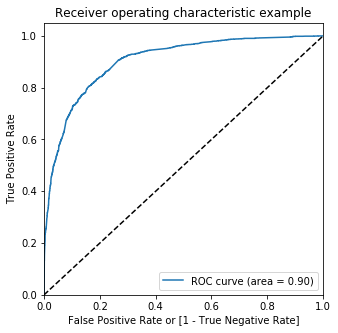

In [170]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob,)

# Step 9 : Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [171]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7595,1,0.299386,29.938639,0,1,1,1,0,0,0,0,0,0,0
3337,0,0.036913,3.691307,0,1,0,0,0,0,0,0,0,0,0
5500,0,0.025980,2.598044,0,1,0,0,0,0,0,0,0,0,0
1572,1,0.991411,99.141081,1,1,1,1,1,1,1,1,1,1,1
5488,0,0.056327,5.632747,0,1,0,0,0,0,0,0,0,0,0


In [172]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376573  1.000000  0.000000
0.1   0.1  0.660346  0.967023  0.475101
0.2   0.2  0.785367  0.923797  0.701750
0.3   0.3  0.810035  0.856061  0.782234
0.4   0.4  0.826984  0.775401  0.858143
0.5   0.5  0.833865  0.728610  0.897443
0.6   0.6  0.827823  0.675579  0.919785
0.7   0.7  0.801477  0.553476  0.951279
0.8   0.8  0.778654  0.455437  0.973890
0.9   0.9  0.740728  0.336453  0.984926


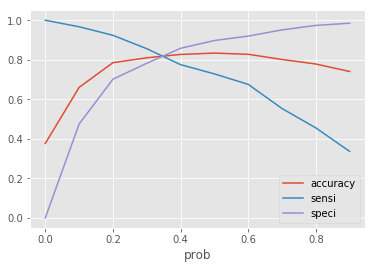

<Figure size 864x864 with 0 Axes>

In [174]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.style.use('ggplot')
plt.figure(figsize = (12,12)) 
plt.show()

#### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

In [175]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
7595,1,0.299386,29.938639,0,1,1,1,0,0,0,0,0,0,0,0
3337,0,0.036913,3.691307,0,1,0,0,0,0,0,0,0,0,0,0
5500,0,0.025980,2.598044,0,1,0,0,0,0,0,0,0,0,0,0
1572,1,0.991411,99.141081,1,1,1,1,1,1,1,1,1,1,1,1
5488,0,0.056327,5.632747,0,1,0,0,0,0,0,0,0,0,0,0


In [176]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.833864742406444

In [177]:
# Confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3334,  381],
       [ 609, 1635]], dtype=int64)

In [178]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [179]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7286096256684492

In [180]:
# Let us calculate specificity
TN / float(TN+FP)

0.897442799461642

In [181]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10255720053835801


In [182]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8110119047619048


In [183]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8455490743089018


# Precision and Recall

In [184]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3334,  381],
       [ 609, 1635]], dtype=int64)

##### Precision
TP / TP + FP

In [185]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8110119047619048

##### Recall
TP / TP + FN

In [186]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7286096256684492

#### Precision and recall tradeoff

In [187]:
from sklearn.metrics import precision_recall_curve

In [188]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

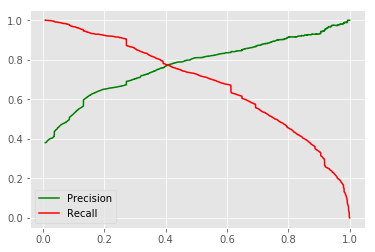

In [189]:
plt.plot(thresholds, p[:-1], "g-", label='Precision')
plt.plot(thresholds, r[:-1], "r-", label='Recall')
plt.legend()
plt.show()

#### From the above graph, The optimum cutoff is 0.5 for getting the required precision

# Step 10: Making predictions on the test set

In [190]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                        'Total Time Spent on Website','Page Views Per Visit']])

In [191]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Other,What is your current occupation_Working Professional,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent
698,-0.515005,0,0,0,0,0,0,0,1,0,0,0,0,0
3471,1.190293,0,0,0,0,0,0,0,0,0,0,0,0,1
1884,-0.659243,0,0,0,0,0,0,0,1,0,0,0,0,0
8113,-0.876513,0,1,0,0,0,0,0,0,1,1,0,0,0
6881,-0.589863,1,0,0,0,0,1,0,0,0,0,1,0,0


In [192]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [193]:
y_test_pred = res.predict(X_test_sm)

In [194]:
y_test_pred[:10]

698     0.067399
3471    0.828434
1884    0.058154
8113    0.991411
6881    0.001652
3793    0.113148
297     0.076752
7684    0.131908
8458    0.131908
7661    0.036913
dtype: float64

In [195]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
698,0.067399
3471,0.828434
1884,0.058154
8113,0.991411
6881,0.001652


In [196]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [197]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [198]:
y_pred_final.head()

,Converted,0
698,0,0.067399
3471,1,0.828434
1884,0,0.058154
8113,1,0.991411
6881,0,0.001652


In [199]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [200]:
y_pred_final.head()

,Converted,Converted_Prob
698,0,0.067399
3471,1,0.828434
1884,0,0.058154
8113,1,0.991411
6881,0,0.001652


Now, similarly tagging the score back to leads as we did for training set

In [201]:
y_pred_final['Lead Score'] = y_pred_final.Converted_Prob.map(lambda x : x*100)
y_pred_final['Lead Score'].index = X_test.index
y_pred_final = pd.DataFrame(y_pred_final)
df_test_leadscore = pd.concat([X_test[col], y_pred_final], axis = 1)

In [202]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [203]:
y_pred_final.head()

,Converted,Converted_Prob,Lead Score,final_predicted
698,0,0.067399,6.739894,0
3471,1,0.828434,82.843407,1
1884,0,0.058154,5.815441,0
8113,1,0.991411,99.141081,1
6881,0,0.001652,0.165160,0


In [204]:
from sklearn.metrics import precision_score, recall_score

In [205]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8206734534064213

In [206]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1426,  166],
       [ 292,  670]], dtype=int64)

In [207]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [208]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6964656964656964

In [209]:
# Let us calculate specificity
TN / float(TN+FP)

0.8957286432160804

##### Precision
TP / TP + FP

In [210]:
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.8014354066985646

##### Recall
TP / TP + FN

In [211]:
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.6964656964656964

Finally, creating a dataset(train+test) with all the Prospect ID and Lead Number brought back and tagged with their corresponging Lead Score

In [212]:
df_leadscore = df_train_leadscore.append(df_test_leadscore, ignore_index=False)

Checking on the df_leadscore dataset

In [213]:
df_leadscore.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Other,What is your current occupation_Working Professional,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Converted,Converted_Prob,Lead Score
7595,1.113609,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.299386,29.938639
3337,-0.876513,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0.036913,3.691307
5500,0.122200,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0.025980,2.598044
1572,-0.876513,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0.991411,99.141081
5488,0.036387,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.056327,5.632747


Sorting the dataset based on index so that it can be merged with Prospect ID and Lead Number that was kept earlier

In [214]:
df_leadscore = df_leadscore.sort_index()

In [215]:
# Checking on the Lead Number as it is an array we will need it to convert in Dataframe
Lead_Number.head()

0    660737
1    660728
2    660727
3    660719
4    660681
Name: Lead Number, dtype: int64

In [216]:
Lead_Prospect_ID = pd.DataFrame(Lead_Prospect_ID)
Lead_Number = pd.DataFrame(Lead_Number)

Now, tagging the prospect Id and Lead Number to the lead score dataset

In [217]:
df_leadscore = pd.concat([df_leadscore, Lead_Prospect_ID, Lead_Number], axis = 1, ignore_index = False)

Checking the merged dataset

In [218]:
df_leadscore.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Other,What is your current occupation_Working Professional,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Converted,Converted_Prob,Lead Score,Prospect ID,Lead Number
0,-0.876513,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.271887,27.188732,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737
1,0.354076,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.314344,31.434409,2a272436-5132-4136-86fa-dcc88c88f482,660728
2,1.920613,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.894511,89.451144,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727
3,-0.319644,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.129704,12.970353,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719
4,1.730730,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0.274931,27.493085,3256f628-e534-4826-9d63-4a8b88782852,660681


Fetching only requited attributes for the Leads

In [219]:
df_leadscore[['Prospect ID', 'Lead Number', 'Converted', 'Converted_Prob', 'Lead Score']]

,Prospect ID,Lead Number,Converted,Converted_Prob,Lead Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.271887,27.188732
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0.314344,31.434409
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,0.894511,89.451144
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0.129704,12.970353
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,0.274931,27.493085
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,0,0.036913,3.691307
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,1,0.913160,91.315994
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,0,0.036913,3.691307
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,0,0.036653,3.665337
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,0,0.051845,5.184451
